# General results plots

Generates violin and box plots for each model classification accuracy in test set for 1,3,5,7 shots.

# Import libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import pickle
import scipy.stats
import matplotlib.pyplot as plt 
import scipy.stats as st
import statistics

# Choose directory

Available directories correspond to the following models
* SiameseZero: Siamese neural network with no weights. Basically a KNN with euclidean distance.
* SiameseFCN: Siamese fully connected neural network.
* SiameseConvolutional: Siamese convolutional neural network
* SiameseLSTM: Siamese LSTM neural network
* SiameseBiLSTM: Siamese Bidirectional LSTM neural network

For each directory, there might be the following subdirectories (not all models have both):
* AllSupport: Contains results using as support the class average for all phrases
* TrainSupport: Contains results using as support the class average of only train phrases

In [27]:
model = "SiameseZero"
subdir = "TrainSupport"
directory = model + "/" + subdir + "/"

# Confidence interval function

In [28]:
def mean_confidence_interval(data, confidence=0.95):
    alpha = 1-confidence
    mean = np.mean(data)
    n = len(data)
    S = statistics.stdev(data)
    SE = S/np.sqrt(n)
    z = st.norm.ppf(round(alpha/2,7))
    return mean + z*SE, mean, mean - z*SE

# Write data to dataframes

In [29]:
data = []
for i in range(1,8,2):
    #x is an array containing tuples of the form: 
    #(v_acc_tr,v_acc_te,c_acc_tr,c_acc_te,acc_c_class_train,acc_c_class_test,history)
    with open(directory + 'k' + str(i) + '.pickle', 'rb') as f:
        x = pickle.load(f)
    v_acc_tr = [a[0] for a in x] #Verification accuracy training
    v_acc_te = [a[1] for a in x] #Verification accuracy test
    c_acc_tr = [a[2] for a in x] #Classification accuracy training
    c_acc_te = [a[3] for a in x] #Classification accuracy tests
    data.append(c_acc_te)

In [30]:
dataframe = pd.DataFrame.from_records(data)
dataframe = dataframe.transpose()
dataframe.columns = ['1','3','5','7']

In [31]:
#conf intervals for the mean of classification accuracy in test
for d in data:
    print(mean_confidence_interval(d))

(0.6265772393392341, 0.6463203463203464, 0.6660634533014587)
(0.8232702746748435, 0.8317324795446461, 0.8401946844144488)
(0.8762385430131069, 0.881176021382207, 0.886113499751307)
(0.8970082276914402, 0.9009888751545118, 0.9049695226175833)


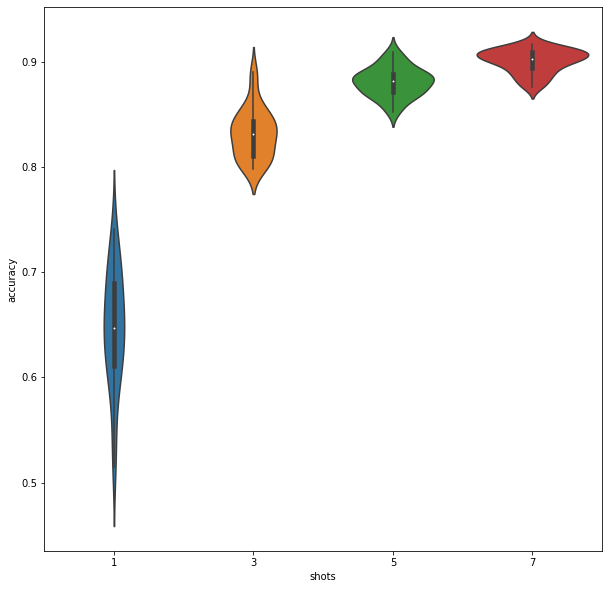

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = sns.violinplot(data=dataframe) #violin plot
ax.set(xlabel='shots', ylabel='accuracy',title="Test Classification Accuracy " + model)
ax.set(xlabel='shots', ylabel='accuracy')
fig.savefig('SiameseZeroSupportTrain_classifAccViolin'+'_'+model)

fig = plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=dataframe) #box plot
ax.set(xlabel='shots', ylabel='accuracy',title="Test Classification Accuracy "+ model)
fig.savefig('SiameseZeroSupportTrain_classifAccBox'+'_'+model)